22H1120016 - Trần Đăng Nam - Mid Term _ Data Mining 16/Apr/2025

Dataset - D6 Magic04 data


In [52]:

import pandas as pd # Xử lý CSV 
import numpy as np  # Tính toán ma trận 

import matplotlib.pyplot as plt # Thư viện plot dữ liệu dùng matplotlib và seaborn
import seaborn as sns               

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV  # dùng Gridsearch tìm hyperparam, kfold để tách dữ liệu và cross validation để đánh giá model
from sklearn.preprocessing import StandardScaler, LabelEncoder # preprocessing data - dùng standard scaler để chuẩn hóa dữ liệu
from sklearn.decomposition import PCA


#  import các Model Classifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# import các Model Clustering
from sklearn.cluster import KMeans, DBSCAN

# các tiêu chí evaluation model 
from sklearn.metrics import f1_score, make_scorer, adjusted_rand_score, silhouette_score
import warnings

import re # Thư viện để xử lý biểu thức chính quy (regular expression)
warnings.filterwarnings('ignore') # Trường hợp có  lỗi thì output không in ra, nói chung là để in output gọn hơn 

# Config pandas -> xử lý data dạng csv 
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


In [53]:
# Đọc file CSV 
file_path = 'D6 - magic04_data.csv'

# header=0 xác nhận dòng đầu tiên là tên cột -  skipinitialspace=True bỏ space sau dấu , của file csv
df = pd.read_csv(file_path, header=0, skipinitialspace=True)

1. Đọc dữ liệu vào bộ nhớ và hiển thị các thông số sau:

  a. Kích thước và chiều của dữ liệu

  b. Kiểu dữ liệu của các thuộc tính

  c. Số lượng thực thể của các giá trị nhãn
  
  d. Giá trị lớn nhất, bé nhất, và trung bình của các cột thuộc tính có giá trị số thực

In [55]:
# --- a. Kích thước và chiều của dữ liệu ---
print(f"\n Kích thước dữ liệu (số hàng, số cột): {df.shape}")
print(f"Số chiều dữ liệu (CSV là structured data -> có 2 chiều): {df.ndim}") # in số chiều dataframe csv 

# --- b. Kiểu dữ liệu của các thuộc tính ---
print("\nKiểu dữ liệu của các thuộc tính:")
print(df.info())

# --- c. Số lượng thực thể của các giá trị nhãn --- cho đi từ index -1 = 10
label_column = df.columns[-1]
print(f"\nSố lượng vectors của mỗi lớp trong cột '{label_column}':")
print(df[label_column].value_counts())

# --- d. Giá trị lớn nhất, bé nhất, và trung bình của các cột thuộc tính số thực ---
numeric_cols = df.select_dtypes(include=np.number).columns

# check điều kiện - do label_column là cột "class" --> nên loại ra khỏi bảng 
if label_column in numeric_cols:
        numeric_cols = numeric_cols.drop(label_column)

print(f"\nGiá trị lớn nhất, bé nhất, và trung bình của các cột thuộc tính số thực:")

# .agg() lấy giá trị min, max, mean
desc_stats = df[numeric_cols].agg(['min', 'max', 'mean'])
print(desc_stats)



 Kích thước dữ liệu (số hàng, số cột): (19020, 11)
Số chiều dữ liệu (CSV là structured data -> có 2 chiều): 2

Kiểu dữ liệu của các thuộc tính:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1.  fLength   19020 non-null  float64
 1   2.  fWidth    19020 non-null  float64
 2   3.  fSize     19020 non-null  float64
 3   4.  fConc     19020 non-null  float64
 4   5.  fConc1    19020 non-null  float64
 5   6.  fAsym     19020 non-null  float64
 6   7.  fM3Long   19020 non-null  float64
 7   8.  fM3Trans  19020 non-null  float64
 8   9.  fAlpha    19020 non-null  float64
 9   10.  fDist    19020 non-null  float64
 10  11.  class    19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB
None

Số lượng vectors của mỗi lớp trong cột '11.  class':
11.  class
g    12332
h     6688
Name: count, dtype: int64

Giá trị lớn nhấ

2. Tạo data mới để trực quan hóa. Data này chỉ lấy các cột thuộc tính là giá trị liên tục. 

Thu giảm số chiều và hiển thị trên không gian 2D, các nhãn khác nhau cho các màu khác nhau.

Số lượng features: 10
Số lượng nhãn: 19020


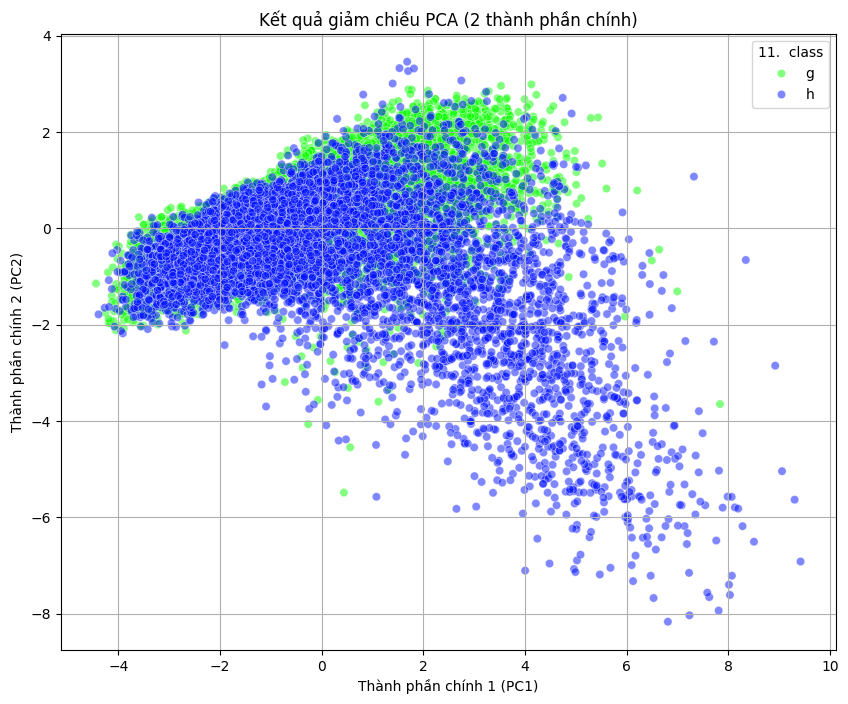

In [56]:
# --- Chuẩn bị dữ liệu ---
# Tách features (X) và labels (y)

feature_columns = df.columns[:-1]
label_column = df.columns[-1]

X = df[feature_columns]
y = df[label_column]

print(f"Số lượng features: {X.shape[1]}")
print(f"Số lượng nhãn: {len(y)}")

# --- Tiền xử lý: Chuẩn hóa dữ liệu (Scale data từ -1 đến 1 --> train model không bị bias)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# --- Giảm "Dimension - chiều" dữ liệu bằng PCA ---
# Giảm xuống còn 2 chiều để trực quan hóa
pca = PCA(n_components=2, random_state=42) # random_state ---> dùng chạy lại code nhưng kết quả vẫn y nguyên 
X_pca = pca.fit_transform(X_scaled)  



# Tạo DataFrame mới chứa kết quả PCA và nhãn gốc
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df[label_column] = y.values # Thêm cột nhãn vào pca_df

# --- Visualize kết quả PCA ---
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="PC1", y="PC2",
    hue=label_column, # Màu sắc dựa trên nhãn gốc
    palette=sns.color_palette("hsv", len(y.unique())), # Bảng màu
    data=pca_df,
    legend="full",
    alpha=0.5 # độ đậm nhạt của point trong bảng 
)

plt.title('Kết quả giảm chiều PCA (2 thành phần chính)')
plt.xlabel('Thành phần chính 1 (PC1)')
plt.ylabel('Thành phần chính 2 (PC2)')
plt.grid(True)
plt.show()

3. Huấn luyện các mô hình học máy và so sánh đánh giá theo k-fold cross validation, với k=10. 

Chọn 3 mô hình để đánh giá trong các mô hình phân lớp sau: KNN, Random Forest, Naive Bayes,  AdaBoost, và SVM.

Tinh chỉnh tham số để các mô hình cho kết quả tốt nhất trước khi so sánh.

Trình bày bảng so sánh hiệu năng các mô hình với độ đo F-Score

In [45]:
# --- convert label ở dataset ('g', 'h') thành số (0, 1)  ---
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print("Mapping nhãn:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


# --- K-Fold Cross Validation cho 10 lần chạy test fol để train ---
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
# print(f"Sử dụng K-Fold Cross Validation với k={k}.")

# --- Định nghĩa độ đo F1-Score ---
f1_scorer = make_scorer(f1_score, average='macro') # Sử dụng 'macro' để tính trung bình F1 cho mỗi lớp mà không quan tâm tần suất



Mapping nhãn: {'g': np.int64(0), 'h': np.int64(1)}


In [57]:
# Chọn các mô hình KNN, Random Forest, SVM, ada, 
models_to_evaluate = {}
results = {}

# 1. Train K-Nearest Neighbors (KNN)

knn_param_grid = {'n_neighbors': list(range(1, 16, 2)), # Thử các giá trị K lẻ từ 1 đến 15
                    'weights': ['uniform', 'distance'],
                    'metric': ['euclidean', 'manhattan', 'minkowski']}
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=kf, scoring=f1_scorer, n_jobs=-1)

# grid search train model KNN
knn_grid_search.fit(X_scaled, y_encoded)
best_knn = knn_grid_search.best_estimator_


models_to_evaluate['KNN'] = best_knn
print(f"  KNN - Tham số tốt nhất: {knn_grid_search.best_params_}")
print(f"  KNN - F1-Score tốt nhất trên tập validation (GridSearch): {knn_grid_search.best_score_:.4f}")


  KNN - Tham số tốt nhất: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
  KNN - F1-Score tốt nhất trên tập validation (GridSearch): 0.8205


In [58]:
# 2. Naive Bayes
gnb_param_grid = {'var_smoothing': np.logspace(0,-9, num=20)} # Tạo 10 giá trị từ 1e0 đến 1e-9
gnb_grid_search = GridSearchCV(GaussianNB(), 
                               gnb_param_grid, 
                               cv=kf, 
                               scoring=f1_scorer, 
                               n_jobs=-1)
gnb_grid_search.fit(X_scaled, y_encoded)
best_gnb = gnb_grid_search.best_estimator_

models_to_evaluate['Naive Bayes'] = best_gnb 
print(f"  Naive Bayes - Tham số tốt nhất: {gnb_grid_search.best_params_}")
print(f"  Naive Bayes - F1-Score tốt nhất trên tập validation (GridSearch): {gnb_grid_search.best_score_:.4f}")

  Naive Bayes - Tham số tốt nhất: {'var_smoothing': np.float64(0.00016237767391887227)}
  Naive Bayes - F1-Score tốt nhất trên tập validation (GridSearch): 0.6529


In [61]:
print("\n3. Đang chạy SVM với lưới tham số SIÊU TỐI THIỂU (chỉ kernel linear, C=1)...")

svm_param_grid_fastest = [
    {
        'kernel': ['linear'],
        'C': [1] 
    }
    # Không thử kernel RBF - do data quá lớn 
]

#tạm bỏ gridsearch vì quá nhiều data 


print("Sử dụng lưới tham số SVM siêu tối thiểu:")
print(svm_param_grid_fastest)


svm_grid_search = GridSearchCV(SVC(kernel='linear', C=1, probability=True, random_state=42),
                               param_grid={}, # Grid trống vì tham số đã cố định trong SVC()
                               cv=kf,
                               scoring=f1_scorer,
                               n_jobs=-1) # Vẫn dùng đa nhân nếu có thể


print("Bắt đầu chạy cross-validation cho SVM (siêu tối thiểu)...")
svm_grid_search.fit(X_scaled, y_encoded) 
print("Cross-validation cho SVM (siêu tối thiểu) hoàn tất.")

best_svm = svm_grid_search.best_estimator_ # Sẽ là SVC(kernel='linear', C=1, ...)
models_to_evaluate['SVM'] = best_svm

print(f"  SVM - Tham số sử dụng: {{'kernel': 'linear', 'C': 1}}") 

mean_cv_score = svm_grid_search.cv_results_['mean_test_score'][0]
print(f"  SVM - Mean F1-Score trên tập validation (Cross Validation): {mean_cv_score:.4f}")


3. Đang chạy SVM với lưới tham số SIÊU TỐI THIỂU (chỉ kernel linear, C=1)...
Sử dụng lưới tham số SVM siêu tối thiểu:
[{'kernel': ['linear'], 'C': [1]}]
Bắt đầu chạy cross-validation cho SVM (siêu tối thiểu)...
Cross-validation cho SVM (siêu tối thiểu) hoàn tất.
  SVM - Tham số sử dụng: {'kernel': 'linear', 'C': 1}
  SVM - Mean F1-Score trên tập validation (Cross Validation): 0.7584



--- Đánh giá hiệu năng các mô hình tốt nhất bằng 10-Fold CV ---
  KNN: Mean F1-Score = 0.8205 (Std Dev = 0.0064)
  Naive Bayes: Mean F1-Score = 0.6529 (Std Dev = 0.0120)
  SVM: Mean F1-Score = 0.7584 (Std Dev = 0.0157)

Bảng so sánh hiệu năng (F1-Score Macro):
      Model  Mean F1-Score  Std Dev F1-Score
        KNN       0.820472          0.006792
        SVM       0.758364          0.016528
Naive Bayes       0.652927          0.012623


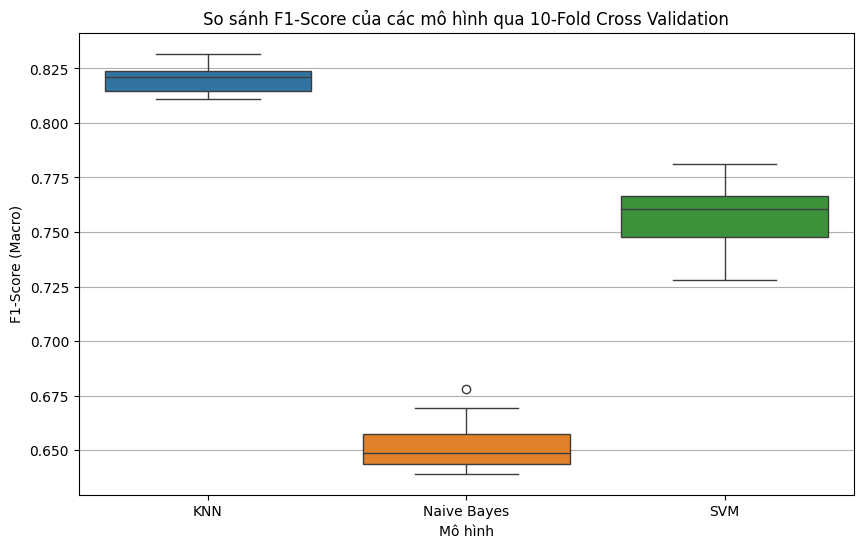

In [62]:
# --- So sánh hiệu năng các mô hình đã tinh chỉnh ---
print(f"\n--- Đánh giá hiệu năng các mô hình tốt nhất bằng {k}-Fold CV ---")
f1_scores_comparison = {}

for name, model in models_to_evaluate.items():
    cv_scores = cross_val_score(model, X_scaled, y_encoded, cv=kf, scoring=f1_scorer, n_jobs=-1)
    f1_scores_comparison[name] = cv_scores
    print(f"  {name}: Mean F1-Score = {cv_scores.mean():.4f} (Std Dev = {cv_scores.std():.4f})")

# --- Trình bày bảng so sánh ---
comparison_df = pd.DataFrame(f1_scores_comparison)
comparison_summary = pd.DataFrame({
    'Model': comparison_df.columns,
    'Mean F1-Score': comparison_df.mean().values,
    'Std Dev F1-Score': comparison_df.std().values
})
comparison_summary = comparison_summary.sort_values(by='Mean F1-Score', ascending=False)

print("\nBảng so sánh hiệu năng (F1-Score Macro):")
print(comparison_summary.to_string(index=False))

# (Optional) Boxplot để so sánh trực quan
plt.figure(figsize=(10, 6))
sns.boxplot(data=comparison_df)
plt.title(f'So sánh F1-Score của các mô hình qua {k}-Fold Cross Validation')
plt.ylabel('F1-Score (Macro)')
plt.xlabel('Mô hình')
plt.grid(axis='y')
plt.show()


4. Loại trừ cột nhãn và thực hiện gom cụm với K-Means và DBSCAN. 

Dùng giá trị nhãn để đánh giá kết quả gom cụm của hai giải thuật trên.


--- Bắt đầu Section 4: Gom cụm ---
Số lượng cụm mục tiêu (dựa trên nhãn gốc): 2

1. Thực hiện gom cụm K-Means...
  Đã hoàn thành K-Means.
  Đánh giá K-Means (so với nhãn gốc):
    Adjusted Rand Index (ARI): 0.0065

2. Thực hiện gom cụm DBSCAN...
  Đã hoàn thành DBSCAN (với eps=0.5, min_samples=5).
  DBSCAN tìm thấy 120 cụm và 12518 điểm nhiễu.
  Lưu ý: Có 12518 điểm bị coi là nhiễu (outliers).
  Đánh giá DBSCAN (so với nhãn gốc):
    Adjusted Rand Index (ARI): 0.0120

Bảng so sánh kết quả gom cụm (Adjusted Rand Index - ARI):
Algorithm  ARI Score
  K-Means   0.006518
   DBSCAN   0.011963

Giải thích ARI: Giá trị gần 1.0 cho thấy kết quả gom cụm rất giống với
phân lớp gốc. Giá trị gần 0 hoặc âm cho thấy sự tương đồng ngẫu nhiên hoặc kém.


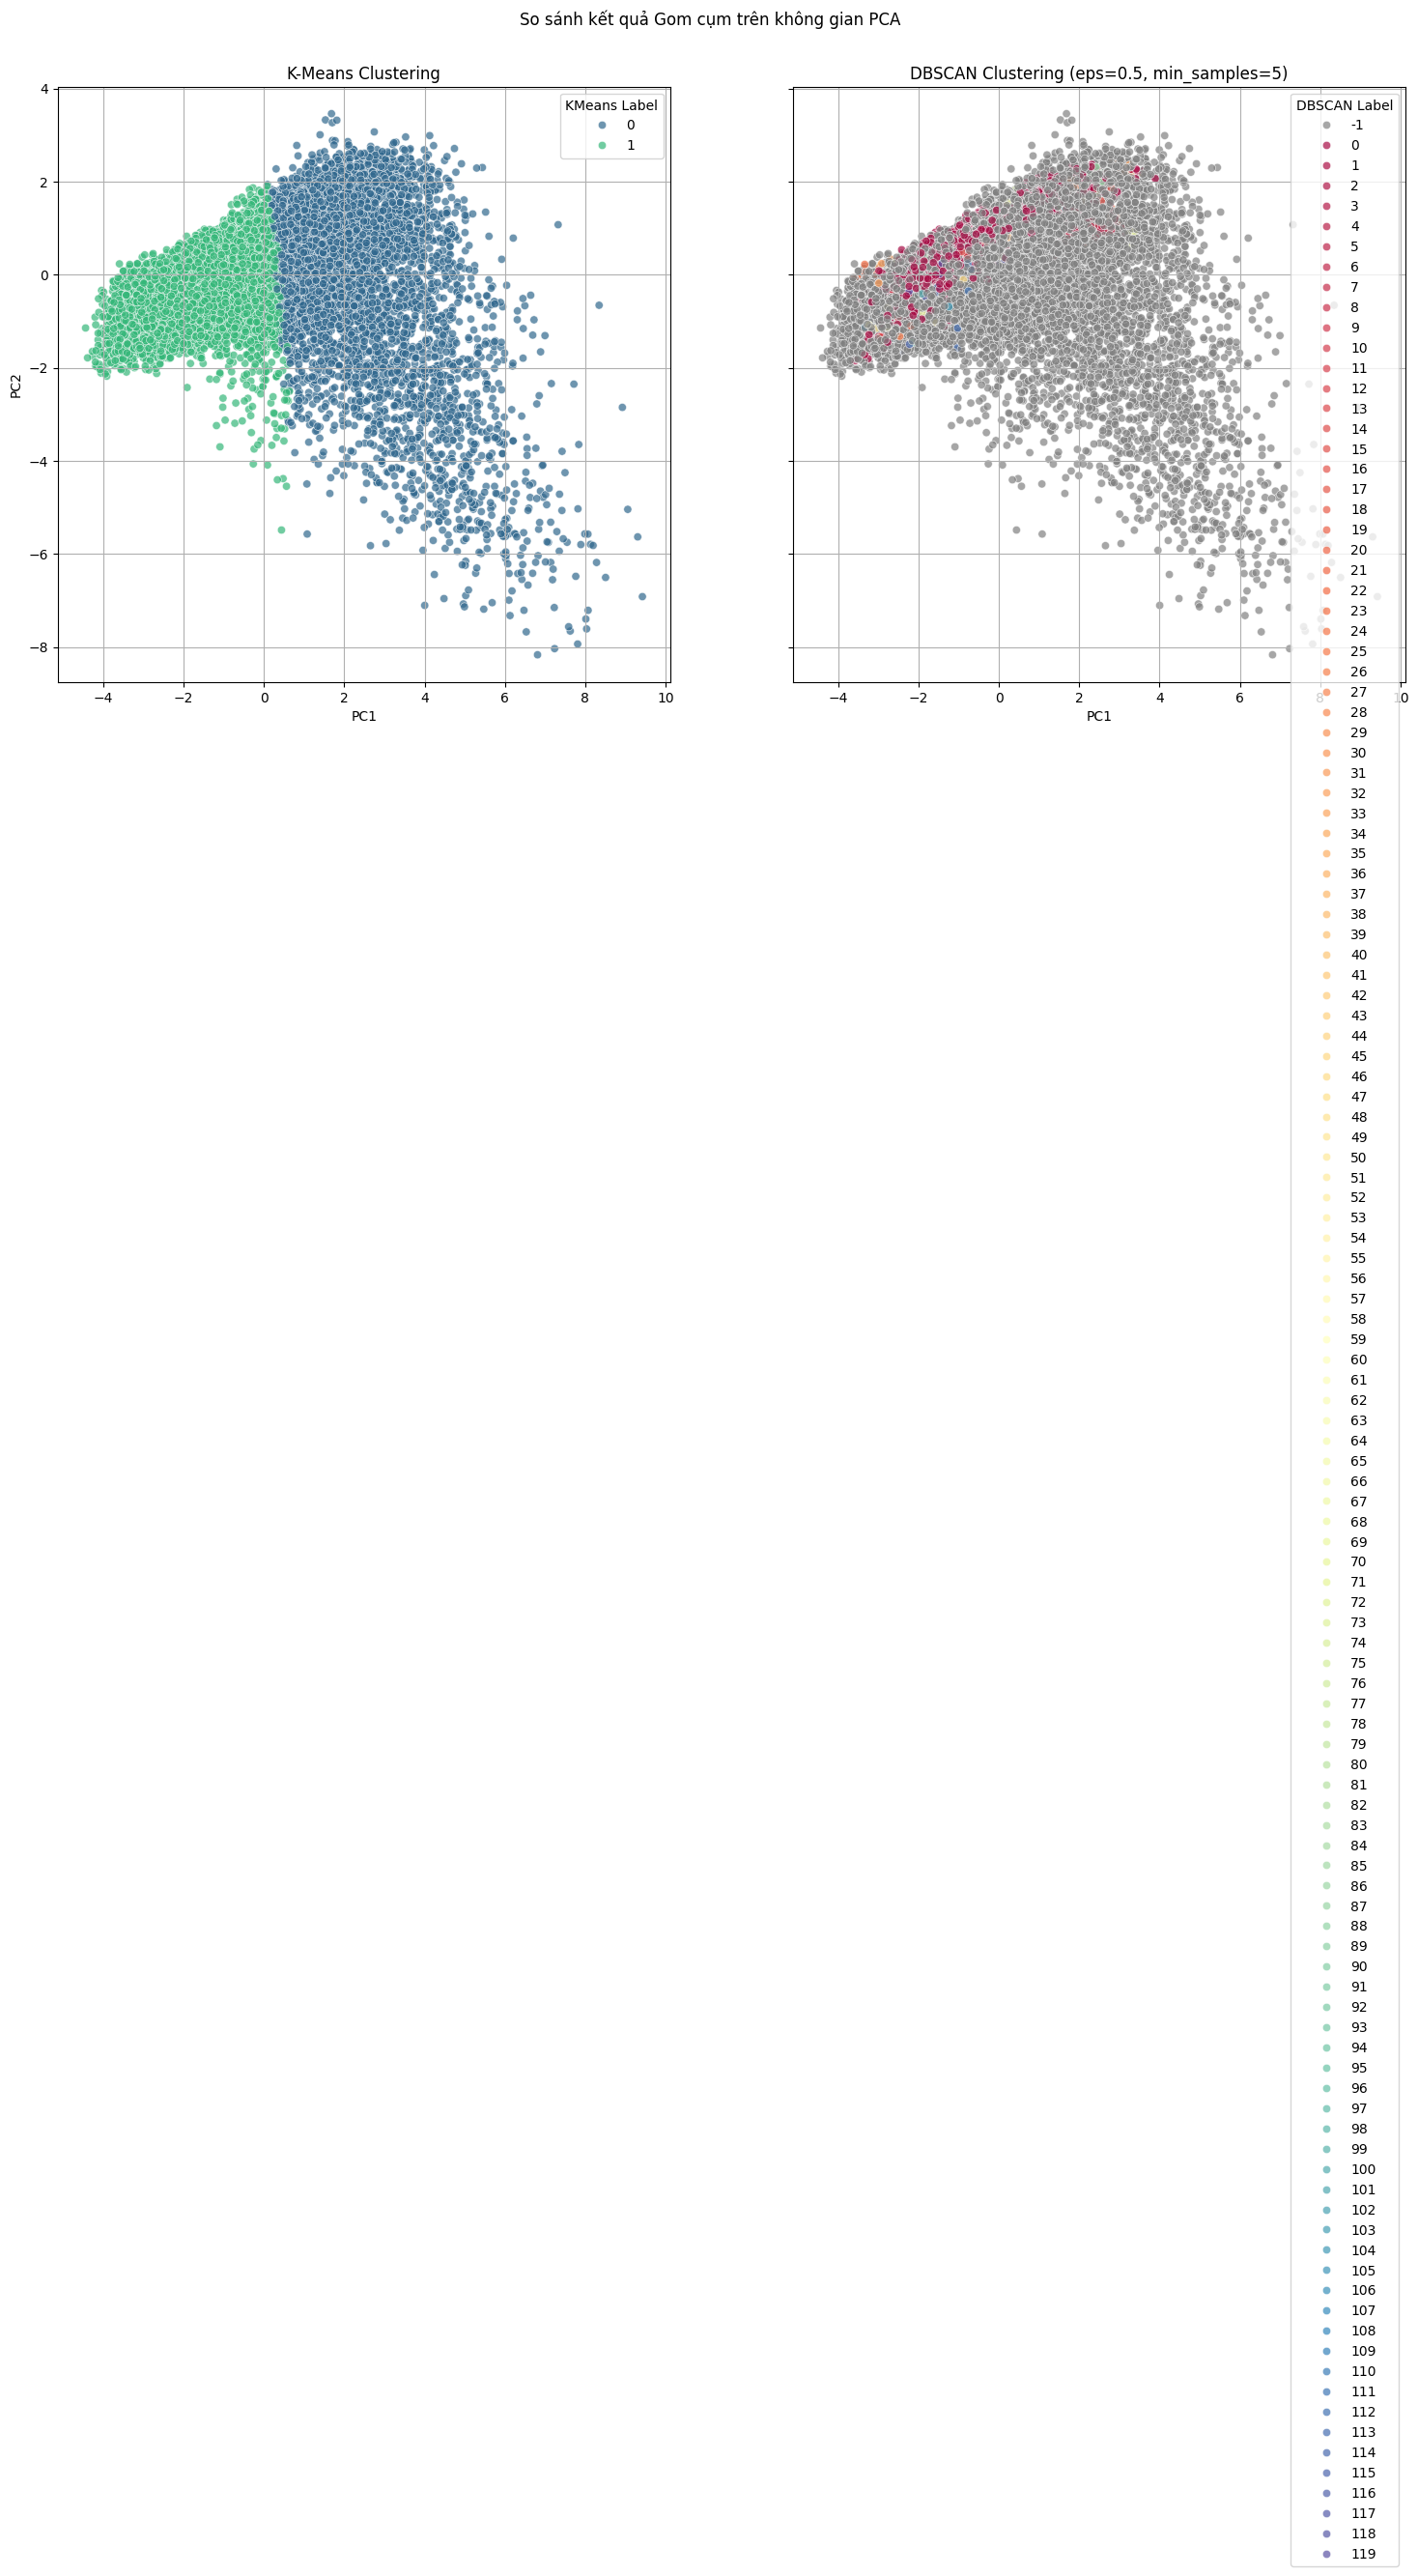

In [65]:
# Kiểm tra xem X_scaled và y_encoded đã được tạo chưa
if 'X_scaled' in locals() and 'y_encoded' in locals():
    print("\n--- Bắt đầu Section 4: Gom cụm ---")


    n_clusters = len(np.unique(y_encoded)) # Số cụm mong muốn = số lớp gốc (2)
    print(f"Số lượng cụm mục tiêu (dựa trên nhãn gốc): {n_clusters}")

    clustering_results = {}
    evaluation_scores = {}

    # --- 1. K-Means ---
    # Giữ nguyên K-Means vì nó khá chuẩn và nhanh
    print("\n1. Thực hiện gom cụm K-Means...")
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    clustering_results['K-Means'] = kmeans_labels
    print("  Đã hoàn thành K-Means.")

    # Đánh giá K-Means bằng Adjusted Rand Index (ARI) so với nhãn gốc
    kmeans_ari = adjusted_rand_score(y_encoded, kmeans_labels)
    evaluation_scores['K-Means'] = {'ARI': kmeans_ari}
    print(f"  Đánh giá K-Means (so với nhãn gốc):")
    print(f"    Adjusted Rand Index (ARI): {kmeans_ari:.4f}")


    # --- 2. DBSCAN (Sử dụng eps mặc định = 0.5) ---
    print("\n2. Thực hiện gom cụm DBSCAN...")
    # Sử dụng giá trị eps mặc định của scikit-learn (eps=0.5).
    # LƯU Ý: Với dữ liệu đã chuẩn hóa (X_scaled), eps=0.5 có thể rất nhỏ.
    # Điều này có thể dẫn đến việc nhiều điểm bị coi là nhiễu (nhãn -1)
    # hoặc không tìm thấy cấu trúc cụm mong muốn (2 cụm).
    # Tuy nhiên, việc này đảm bảo chạy nhanh. Để có kết quả tốt hơn,
    # cần phân tích kỹ hơn để chọn eps phù hợp (ví dụ: k-distance plot).
    dbscan = DBSCAN(eps=0.5, min_samples=5) # Sử dụng eps mặc định
    dbscan_labels = dbscan.fit_predict(X_scaled)
    clustering_results['DBSCAN'] = dbscan_labels
    print(f"  Đã hoàn thành DBSCAN (với eps={dbscan.eps}, min_samples={dbscan.min_samples}).")

    # Kiểm tra số cụm tìm được và số điểm nhiễu (nhãn -1)
    n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_noise = np.sum(dbscan_labels == -1)
    print(f"  DBSCAN tìm thấy {n_clusters_dbscan} cụm và {n_noise} điểm nhiễu.")
    if n_clusters_dbscan == 0:
         print("  Cảnh báo: DBSCAN không tìm thấy cụm nào (chỉ có nhiễu hoặc tất cả cùng 1 cụm không hợp lệ).")
    elif n_noise > 0:
         print(f"  Lưu ý: Có {n_noise} điểm bị coi là nhiễu (outliers).")


    # Đánh giá DBSCAN bằng ARI
    # Chỉ tính ARI nếu DBSCAN tìm thấy ít nhất 1 cụm hợp lệ (không phải tất cả là nhiễu)
    if n_clusters_dbscan > 0:
        dbscan_ari = adjusted_rand_score(y_encoded, dbscan_labels)
        evaluation_scores['DBSCAN'] = {'ARI': dbscan_ari}
        print(f"  Đánh giá DBSCAN (so với nhãn gốc):")
        print(f"    Adjusted Rand Index (ARI): {dbscan_ari:.4f}")
    else:
        evaluation_scores['DBSCAN'] = {'ARI': np.nan} # Gán NaN nếu không có cụm hợp lệ
        print("  Không thể tính ARI cho DBSCAN vì không tìm thấy cụm hợp lệ.")


    # --- Trình bày kết quả đánh giá gom cụm ---
    print("\nBảng so sánh kết quả gom cụm (Adjusted Rand Index - ARI):")
    # Lọc bỏ các thuật toán có ARI là NaN trước khi tạo DataFrame
    valid_scores = {k: v for k, v in evaluation_scores.items() if not np.isnan(v['ARI'])}
    if valid_scores:
        ari_comparison = pd.DataFrame({
            'Algorithm': list(valid_scores.keys()),
            'ARI Score': [scores['ARI'] for scores in valid_scores.values()]
        })
        print(ari_comparison.to_string(index=False))
    else:
        print("Không có kết quả ARI hợp lệ để hiển thị.")

    print("\nGiải thích ARI: Giá trị gần 1.0 cho thấy kết quả gom cụm rất giống với")
    print("phân lớp gốc. Giá trị gần 0 hoặc âm cho thấy sự tương đồng ngẫu nhiên hoặc kém.")

    # --- (Optional) Trực quan hóa kết quả gom cụm trên không gian PCA ---
    # Kiểm tra xem pca_df có tồn tại không (từ Section 2)
    if 'pca_df' in locals():
        pca_df_cluster = pca_df.copy()
        pca_df_cluster['KMeans Label'] = kmeans_labels
        pca_df_cluster['DBSCAN Label'] = dbscan_labels # Thêm nhãn DBSCAN mới

        fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharex=True, sharey=True)
        fig.suptitle('So sánh kết quả Gom cụm trên không gian PCA')

        # K-Means plot (giữ nguyên)
        sns.scatterplot(ax=axes[0], x='PC1', y='PC2', hue='KMeans Label', palette='viridis',
                        data=pca_df_cluster, legend='full', alpha=0.7)
        axes[0].set_title('K-Means Clustering')
        axes[0].set_xlabel('PC1')
        axes[0].set_ylabel('PC2')
        axes[0].grid(True)

        # DBSCAN plot (cập nhật title và xử lý màu)
        unique_labels_dbscan = sorted(pca_df_cluster['DBSCAN Label'].unique())
        # Đảm bảo đủ màu cho số lượng cụm + nhiễu (-1)
        palette_dbscan = sns.color_palette("Spectral", n_colors=len(unique_labels_dbscan))
        color_map_dbscan = {label: color for label, color in zip(unique_labels_dbscan, palette_dbscan)}
        if -1 in color_map_dbscan:
            color_map_dbscan[-1] = (0.5, 0.5, 0.5, 1.0) # Màu xám cho nhiễu

        sns.scatterplot(ax=axes[1], x='PC1', y='PC2', hue='DBSCAN Label', palette=color_map_dbscan,
                        data=pca_df_cluster, legend='full', alpha=0.7)
        # Cập nhật title để hiển thị đúng giá trị eps, min_samples đã dùng
        axes[1].set_title(f'DBSCAN Clustering (eps={dbscan.eps}, min_samples={dbscan.min_samples})')
        axes[1].set_xlabel('PC1')
        axes[1].set_ylabel('PC2')
        axes[1].grid(True)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()
    else:
        print("\nDataFrame 'pca_df' không tồn tại, bỏ qua phần trực quan hóa gom cụm.")


else:
    print("Lỗi: Dữ liệu cần thiết (X_scaled, y_encoded) chưa sẵn sàng. Bỏ qua Section 4.")